# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [136]:
import pandas as pd

data = pd.read_csv('Advertising.zip', index_col=0)
data.head()


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Вывод: явных пропусков не обнаружено. Поскольку все значения являются денежными суммами, проверим есть ли не положительные значения

In [138]:
for col in data.columns:
    df = data[data[col] <= 0]
    if df.shape[0] > 0:
        print(df)

       TV  radio  newspaper  sales
128  80.2    0.0        9.2    8.8


Вывод: найдена строка с нулевым бюджетом для рекламы на радио. Удалять ее не будем, поскольку ситуация вполне реальная.

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [139]:
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']
X = X.values
y = y.values


## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [140]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [141]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python
num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [142]:
num_iters = 1000 # количество итераций
m = X.shape[0] # количество строк в матрице X
n = X.shape[1] # количество столбцов в матрице X
w = np.zeros((n, 1))

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])

        # Обновляем новое значение k-ого коэффициента
        w[k] = (X[:,k].T @ (y - h))

        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))

w = w.T[0]
print(f'Коэффициенты модели: {w}')


Коэффициенты модели: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [143]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [144]:
X = data[['TV', 'radio', 'newspaper']].values
X = (X - X.mean(axis=0)) / X.std(axis=0)

**Добавим единичный столбец**

In [145]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [146]:
def mse_error(y, y_pred) -> float:
    """
    Функция для вычисления Mean Squared Error (MSE).

    Params:
    - y: массив с реальными значениями.
    - y_pred: массив с предсказанными значениями.

    Returns:
    - float: Значение MSE.
    """
    # Проверка, что оба массива имеют одинаковую длину
    if len(y) != len(y_pred):
        raise ValueError("Длины массивов не совпадают.")

    # Вычисление квадратов разностей между реальными и предсказанными значениями
    squared_diff = (np.array(y) - np.array(y_pred)) ** 2

    # Вычисление среднего значения квадратов разностей
    mse = np.mean(squared_diff)

    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [147]:
y_mean_value = y.mean()
y_pred = pd.DataFrame(y)[0].apply(lambda _: y_mean_value).values.reshape(-1, 1)

print(f'MSE: {mse_error(y, y_pred)}')

MSE: 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [148]:
def lin_pred(X, w):
    """
    Функция для получения вектора прогнозов линейной модели.

    Параметры:
    - X: Матрица предикторов, где каждая строка представляет собой один наблюдаемый объект,
         а каждый столбец представляет собой один признак.
    - w: Вектор весов линейной модели.

    Возвращает:
    - Вектор прогнозов.
    """
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [149]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """
    Реализация шага стохастического градиентного спуска.

    Params:
    - X: Матрица предикторов.
    - y: Вектор реальных значений.
    - w: Вектор весов линейной модели.
    - train_ind: Индекс объекта обучающей выборки, по которому считается изменение весов.
    - eta: Шаг градиентного спуска.

    Returns:
    - Вектор обновленных весов.
    """
    # Получение текущего объекта обучающей выборки
    x_i = X[train_ind, :].reshape(-1, 1)  # Преобразование вектора x_i в столбец

    # Предсказание для текущего объекта
    y_pred = np.dot(x_i.T, w)  # Использование транспонирования для правильного выравнивания размерностей

    # Ошибка предсказания
    error = y_pred - y[train_ind]

    # Обновление весов по формуле стохастического градиентного спуска
    w_updated = w - (2 * eta / len(y)) * np.dot(x_i, error)

    return w_updated

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [150]:
def stochastic_gradient_descent(X, y, initial_weights, eta, max_iter, distance):
    """
    Реализация стохастического градиентного спуска.

    Params:
    - X: Матрица признаков.
    - y: Вектор целевых переменных.
    - initial_weights: Начальные веса модели.
    - eta: Шаг градиентного спуска.
    - max_iter: Максимальное число итераций.
    - distance: Евклидово расстояние между векторами весов, при котором алгоритм прекращает работу.

    Returns:
    - Вектор весов w.
    - Список ошибок на каждой итерации.
    """
    w = np.array(initial_weights)
    errors = []

    for _ in range(max_iter):
        w_prev = w.copy()
        train_ind = np.random.randint(len(y))  # случайный выбор индекса объекта обучающей выборки
        w = stoch_grad_step(X, y, w, train_ind, eta)
        errors.append(mse_error(y, lin_pred(X, w)))

        # Проверка на сходимость по критерию distance
        if np.linalg.norm(w - w_prev) < distance:
            break

    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

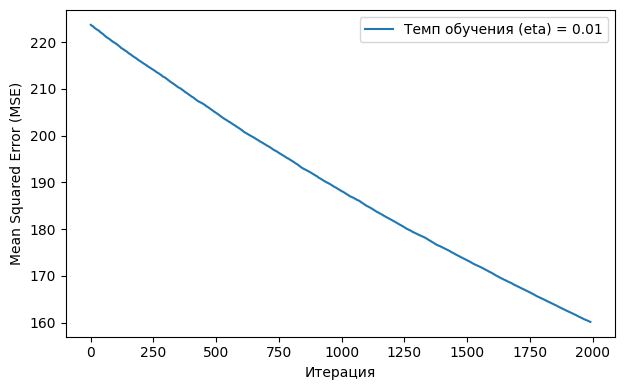

Финальные веса для eta=0.01: [2.52307893 0.72857978 0.45310662 0.14317077]
MSE: 160.17300863881655


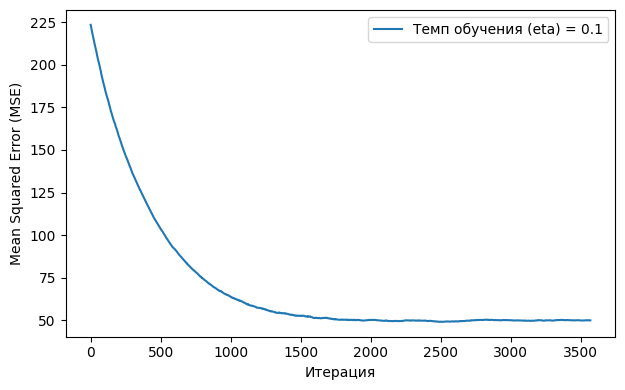

Финальные веса для eta=0.1: [13.65551367  3.78252686  2.65365398  0.13109724]
MSE: 49.989840900686886


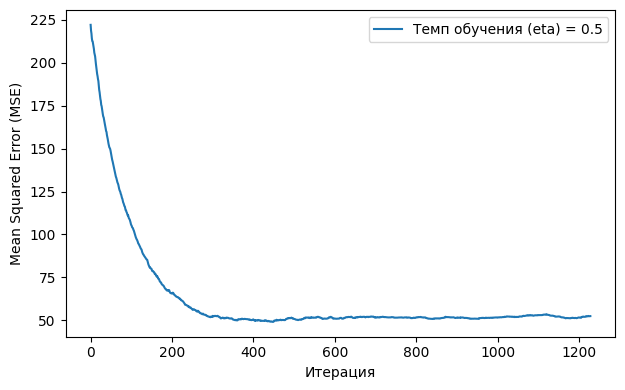

Финальные веса для eta=0.5: [14.14720485  3.8434983   3.06270243 -0.04909495]
MSE: 52.41882332041271


In [171]:
import matplotlib.pyplot as plt

np.random.seed(0)

# Функция для визуализации результатов
def plot_results(X, y, w, errors, eta):
    plt.figure(figsize=(12, 4))

    # Визуализация ошибок на каждой итерации
    plt.subplot(1, 2, 1)
    plt.plot(errors, label=f'Темп обучения (eta) = {eta}')
    plt.xlabel('Итерация')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Параметры для экспериментов
eta_values = [0.01, 0.1, 0.5]
initial_weights = np.zeros(X.shape[1])
max_iter = 10**5
distance = 0.00001

# Запуск стохастического градиентного спуска с разными значениями темпа обучения
best_error = 1000000
best_w = None
for eta in eta_values:
    final_weights, errors = stochastic_gradient_descent(X, y, initial_weights, eta, max_iter, distance)
    plot_results(X, y, final_weights, errors, eta)
    print(f'Финальные веса для eta={eta}:', final_weights)
    print(f'MSE: {errors[-1]}')

    # сохраним веса с наименьшей MSE
    if best_error > errors[-1]:
        best_error = errors[-1]
        best_w = final_weights

**Выведите вектор весов, к которому сошелся метод.**

In [172]:
# ваш код
np.round(best_w, 4)

array([13.6555,  3.7825,  2.6537,  0.1311])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [173]:
# ваш код
best_error

49.989840900686886

#### Выводы:
* метод координатного спуска (c MSE 27.0857) показал лучшие результаты, чем метод стохастического градиентного спуска (с MSE 49.9898)
* использование других случайных последовательностей (np.random.seed(N)), а также разных начальных точек, не помогли улучшить результаты при использования метода стохастического градиентного спуска.
* получены следующие вектора весов:
    * метод координатного спуска:
      [41.56217205, 110.13144155, 73.52860638, -0.55006384]
    * метода стохастического градиентного спуска:
      [13.6555,  3.7825,  2.6537,  0.1311]
* значения весов показывают, что наибольшее влияние на покупки оказывает реклама на телевидении, а наименьшее - реклама в газетах. Причем метод координатного спуска показал ухудшение продаж при рекламе в газетах